In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

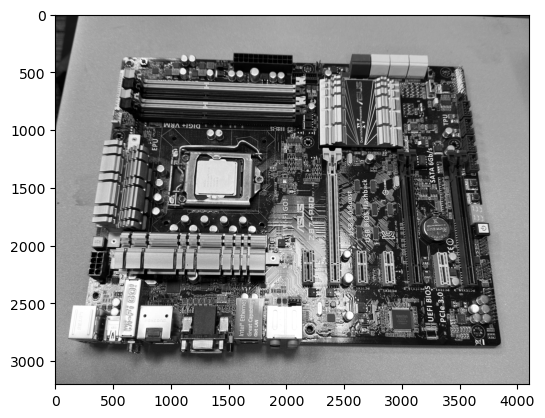

In [50]:
#Loading image and converting to grayscale
img = cv.imread('motherboard_image.JPEG')

img = img[500:3700, 900:5000]

blur = cv.GaussianBlur(img, (5,5), 0)

img_gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap = 'gray')

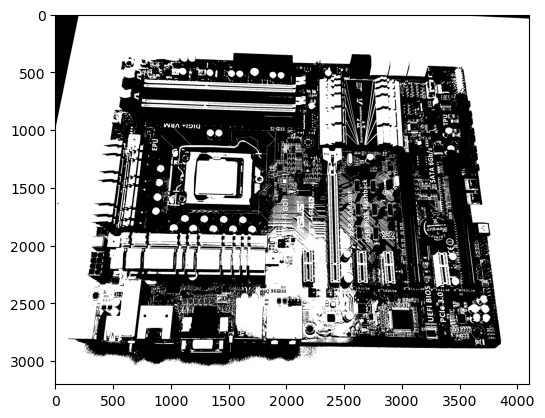

In [51]:
#Thresholding the image
_, thresh = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')

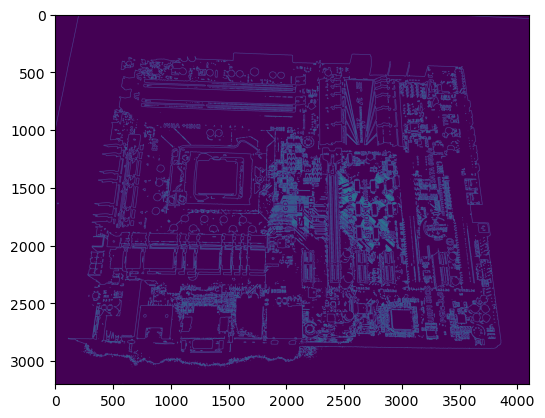

In [94]:
#Find edges
edges = cv.Canny(thresh, 900, 1500)

plt.imshow(edges)

In [ ]:
#cleaning the image
kernel = cv.getStructuringElement(cv.MORPH_RECT, (2,2))
closed_img = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)

cleaned_img = closed_img

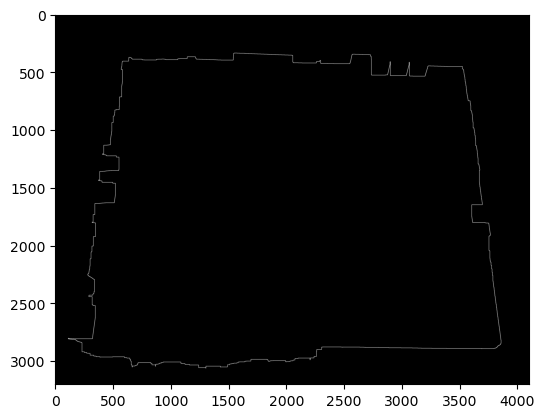

In [102]:
#Find largest contour 

cntrs, _ = cv.findContours(cleaned_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

min_cntr_area = 500

largest_cntr = None
for cntr in cntrs:
    if cv.contourArea(cntr) > min_cntr_area:
        if largest_cntr is None or cv.contourArea(cntr) > cv.contourArea(largest_cntr):
            largest_cntr = cntr


output_img = np.copy(img)

cv.drawContours(output_img, [largest_cntr], -1, (0, 255), 3)

cntr_img = np.zeros_like(img)
cv.drawContours(cntr_img, [largest_cntr], -1, (255, 255, 255), 2)

plt.imshow(cntr_img)